In [ ]:
import numpy as np

In [ ]:
x = np.array([1,2,3])
y = np.array([2,2,4])

x = x.reshape(len(x),1)
ones = np.ones((x.shape[0],1))
x_train = np.concatenate((ones,x),axis=1)
# y_train = y[:,np.newaxis]
y_train = y.reshape(len(y),1)
# print(x_train, '\n', y_train)

# b = inv(X^T . X) . X^T . Y
LHS = np.dot(np.transpose(x_train), x_train)
RHS = np.dot(np.transpose(x_train),y)
betas = np.dot(np.linalg.inv(LHS), RHS)
betas

array([0.66666667, 1.        ])

In [ ]:
def LR(x_train, y_train):
  x_train = x_train.reshape(len(x_train),1)
  ones = np.ones((x_train.shape[0],1))
  X = np.concatenate((ones,x_train),axis=1)
  # Y = y_train[:,np.newaxis]
  Y = y_train.reshape(len(y_train),1)

  # b = inv(X^T . X) . X^T . Y
  LHS = np.dot(np.transpose(X), X)
  RHS = np.dot(np.transpose(X),Y)
  return np.dot(np.linalg.inv(LHS), RHS)

LR(np.array([1,2,3]), np.array([2,2,4]))

array([[0.66666667],
       [1.        ]])

[-1.         -0.87878788 -0.75757576]
[-0.33333333 -0.21212121 -0.09090909]


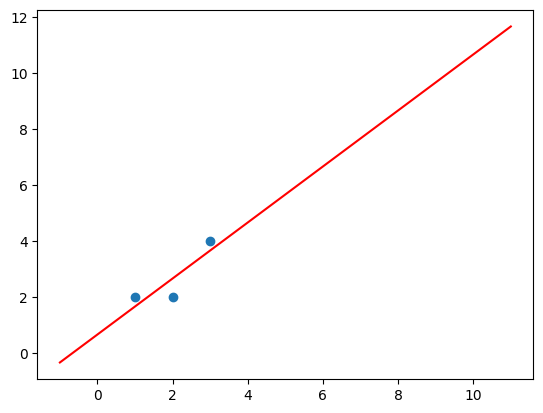

In [ ]:
x_train = np.array([1,2,3])
y_train = np.array([2,2,4])
res = LR(x_train, y_train)
beta0 = res[0]
beta1 = res[1]

import matplotlib.pyplot as plt

f = lambda x : beta0 + beta1 * x
x_test = np.linspace(-1,11, 100)
print(x_test[:3])
y_test = f(x_test)
print(y_test[:3])
plt.scatter(x_train, y_train)
plt.plot(x_test, y_test, 'red')
plt.show()

beta0: [0.66666667] 
beta1: [1.]


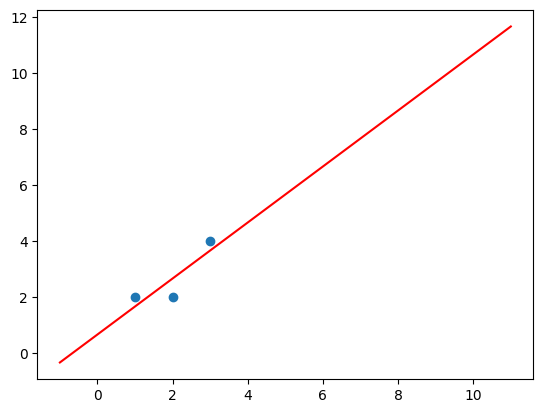

In [ ]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(x_train.reshape(len(x_train),1), y_train[:,np.newaxis])
print('beta0:', reg.intercept_, '\nbeta1:', reg.coef_[0])

x_test = np.linspace(-1,11, 100)
y_test = reg.predict(x_test.reshape(len(x_test),1))
plt.scatter(x_train, y_train)
plt.plot(x_test, y_test, 'red')
plt.show()

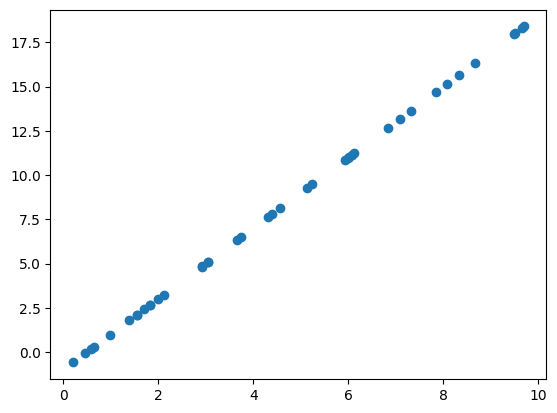

In [ ]:
def make_data(N):
  rng = np.random.RandomState(42) # seed could be anything
  x = 10 * rng.rand(N,1)
  y = 2 * x.ravel() - 1
  # y = 10 - (1/(x.ravel()+0.1)) + rng.randn(N)
  return x, y
x , y = make_data(40)
x.shape, y.shape

plt.scatter(x.ravel(), y)
plt.show()

In [ ]:
def make_data(N):
  rng = np.random.RandomState(42) # seed could be anything
  x = 10 * rng.rand(N)
  y = 2 * x.ravel() - 1 + rng.randn(N)
  # y = 10 - (1/(x.ravel()+0.1)) + rng.randn(N)
  return x, y
x , y = make_data(40)
x.shape, y.shape

((40,), (40,))

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

x = np.array([2,3,4])
poly = PolynomialFeatures(degree=3, include_bias=False)
poly.fit_transform(x[:,None])

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

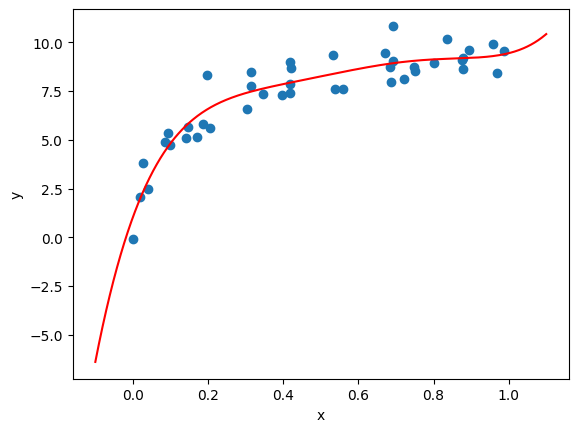

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

def PolynomialRegression(degree=2, **kwargs):
  return make_pipeline(PolynomialFeatures(degree),
                       LinearRegression(**kwargs))

def make_data(N):
  rng = np.random.RandomState(1) # seed could be anything
  x = rng.rand(N,1)
  y = (10 - (1/(x.ravel()+0.1))) + rng.randn(N)
  return x, y
x , y = make_data(42)

x_test = np.linspace(-0.1,1.1,500)[:, np.newaxis]
y_test = PolynomialRegression(5).fit(x, y).predict(x_test)

plt.scatter(x.ravel(), y)
plt.plot(x_test.ravel(), y_test, 'red')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


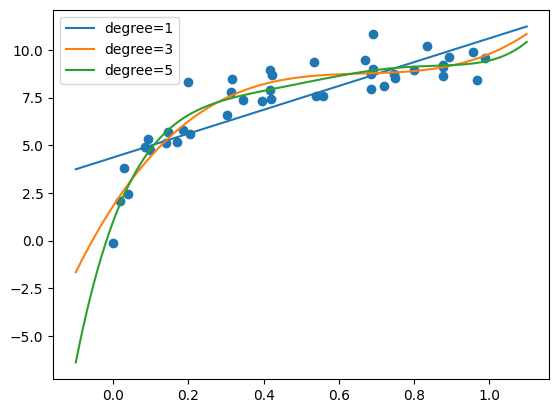

In [ ]:
for degree in [1,3,5]:
  y_test = PolynomialRegression(degree).fit(x, y).predict(x_test)
  plt.plot(x_test.ravel(), y_test, label='degree={0}'.format(degree))
plt.scatter(x.ravel(), y)
plt.legend(loc='best')

[[0.         0.         0.         0.         0.         0.
  0.        ]
 [0.70816985 0.68277997 0.65890608 0.74237055 0.64554783 0.7009737
  0.65164168]
 [0.84240191 0.84482313 0.82615363 0.86688568 0.80389772 0.83490036
  0.82366929]] (21, 7)


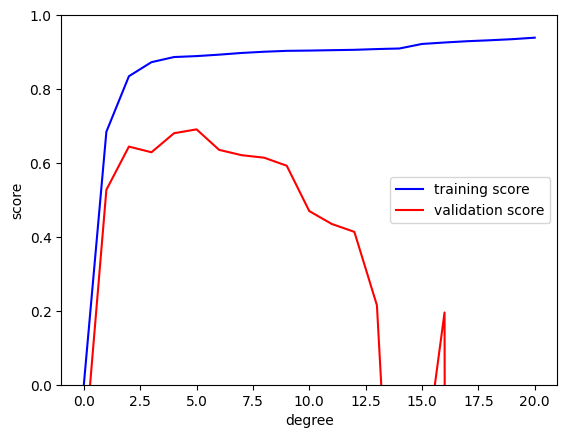

In [ ]:
from sklearn.model_selection import validation_curve
degree = np.arange(0,21)
train_score, val_score = validation_curve(PolynomialRegression(), x, y,
                                          param_name='polynomialfeatures__degree',
                                          param_range=degree, cv=7)
print(train_score[:3], val_score.shape)

plt.plot(degree, np.mean(train_score, axis=1), color='blue', label='training score')
plt.plot(degree, np.mean(val_score, axis=1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0,1)
plt.xlabel('degree')
plt.ylabel('score')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'polynomialfeatures__degree': np.arange(21),
              'linearregression__fit_intercept': [True, False],}
grid = GridSearchCV(PolynomialRegression(), param_grid, cv=7)
grid.fit(x, y)
print(grid.best_params_)

{'linearregression__fit_intercept': False, 'polynomialfeatures__degree': 5}
